In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Car details.csv to Car details.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
cars = pd.read_csv("Car details.csv")

In [ ]:
cars.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [ ]:
cars.shape

(8128, 13)

In [ ]:
cars.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [ ]:
cars =cars.dropna(how = 'any')
cars.shape

(7906, 13)

In [ ]:
import re

### Extracting RPM Values from Torque Data

This code extracts the highest RPM values from the 'torque' column of a DataFrame. It converts the column to a list, cleans each string by removing periods and commas, extracts numerical values, and stores the highest value found in each string into a new list called `torque_rpm`.


In [ ]:
torque_list = cars['torque'].to_list()
# torque_list[:2]
torque_rpm = []
def extractingRPM(x):
  for item in x:
    res = item.replace(".", "")
    res = res.replace(",", "")
    temp = [int(s) for s in re.findall(r'\d+', res)]
    torque_rpm.append(max(temp))

extractingRPM(torque_list)
print(torque_list[:2])
print(torque_rpm[:2])

['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm']
[2000, 2500]


In [ ]:
cars['torque_rpm'] = torque_rpm
cars.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500


In [ ]:
mil_list = cars['mileage'].to_list()
# torque_list[:2]
mil_kmpl = []
def extractingmil(x):
  for item in x:
    temp = []
    try:
      for s in item.split(" "):
        temp.append(float(s))
    except:
      pass
    mil_kmpl.append(max(temp))

extractingmil(mil_list)
print(mil_list[:2])
print(mil_kmpl[:2])

['23.4 kmpl', '21.14 kmpl']
[23.4, 21.14]


In [ ]:
engine_list = cars['engine'].to_list()
# torque_list[:2]
engine_cc = []
def extractingEngine(x):
  for item in x:
    temp = []
    try:
      for s in item.split(" "):
        temp.append(float(s))
    except:
      pass
    engine_cc.append(max(temp))

extractingEngine(engine_list)
print(engine_list[:2])
print(engine_cc[:2])

['1248 CC', '1498 CC']
[1248.0, 1498.0]


In [ ]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2700
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,2750
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,4500


In [ ]:
cars['engine_cc'] = engine_cc

cars.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,engine_cc
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,1498.0


In [ ]:
power_list = cars['max_power'].to_list()
# torque_list[:2]
max_power = []
def extractingPower(x):
  for item in x:
    temp = []
    try:
      for s in item.split(" "):
        temp.append(float(s))
    except:
      pass
    max_power.append(max(temp))

extractingPower(power_list)
print(power_list[:2])
print(max_power[:2])

['74 bhp', '103.52 bhp']
[74.0, 103.52]


In [ ]:
cars['max_power_new'] = max_power

cars.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,engine_cc,max_power_new
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,1498.0,103.52


In [ ]:
cars_new = cars.drop(['mileage', 'engine', 'max_power', 'torque'], axis = 1)

In [ ]:
cars_new.describe()

,year,selling_price,km_driven,seats,torque_rpm,engine_cc,max_power_new
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393,3474.631419,1458.708829,91.587374
std,3.863695,8.135827e+05,5.679230e+04,0.959208,2579.612132,503.893057,35.747216
min,1994.000000,2.999900e+04,1.000000e+00,2.000000,400.000000,624.000000,32.800000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000,2500.000000,1197.000000,68.050000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000,3000.000000,1248.000000,82.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000,4000.000000,1582.000000,102.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,43639.000000,3604.000000,400.000000


Data needs normalization

In [ ]:
# Check data types to identify non-numeric columns
print(cars_new.dtypes)

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
seats            float64
torque_rpm         int64
engine_cc        float64
max_power_new    float64
dtype: object


In [ ]:
# Select only numeric columns for the correlation matrix
numeric_cols = cars_new.select_dtypes(include=[np.number])

# Verify the selected numeric columns
print(numeric_cols.head())

   year  selling_price  km_driven  seats  torque_rpm  engine_cc  max_power_new
0  2014         450000     145500    5.0        2000     1248.0          74.00
1  2014         370000     120000    5.0        2500     1498.0         103.52
2  2006         158000     140000    5.0        2700     1497.0          78.00
3  2010         225000     127000    5.0        2750     1396.0          90.00
4  2007         130000     120000    5.0        4500     1298.0          88.20


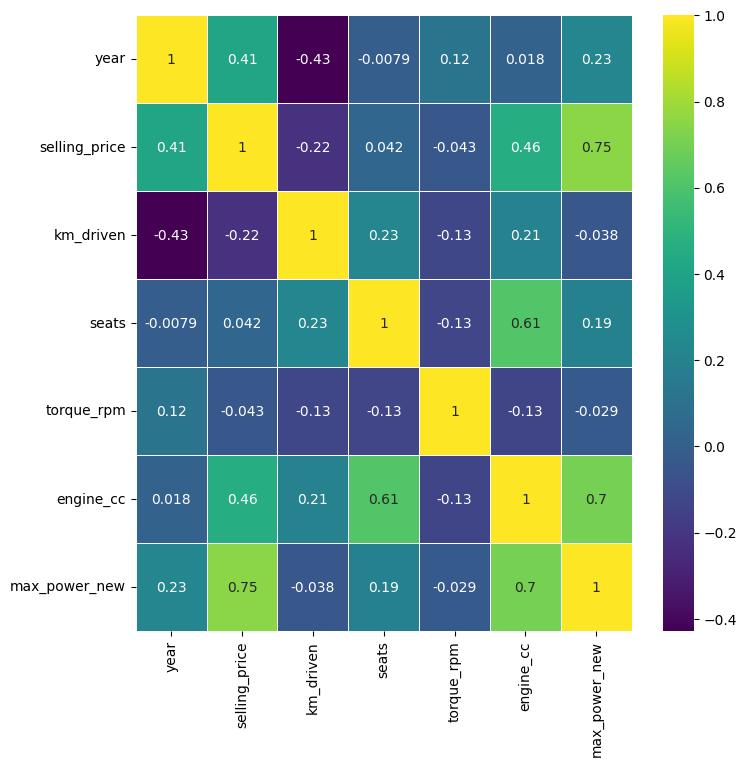

In [ ]:
# Plot the heatmap with numeric columns
plt.figure(figsize=(8, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='viridis', linewidths=.5)
plt.show()

1. Diagonal Elements: Always 1, indicating perfect correlation with itself.

2. High Positive Correlation:
* max_power_new and selling_price (0.75): Higher max power tends to increase selling price.
* engine_cc and seats (0.61): Larger engine capacities correlate with more seats.
3. High Negative Correlation:
*km_driven and year (-0.43): Newer cars have lower kilometers driven.
4. Moderate Correlation:
* mil_kmpl and engine_cc (-0.58): Larger engine capacities tend to have lower mileage.
* year and mil_kmpl (0.33): Newer cars tend to have better mileage.
5. Low or No Correlation:
* seats and year (-0.0079): No significant relationship between the number of seats and the car's year.

In [ ]:
cars_new.shape

(7906, 12)

In [ ]:
cars_new['fuel'].value_counts()

fuel
Diesel    4299
Petrol    3520
CNG         52
LPG         35
Name: count, dtype: int64

In [ ]:
cars_new['seller_type'].value_counts()

seller_type
Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: count, dtype: int64

In [ ]:
cars_new['transmission'].value_counts()

transmission
Manual       6865
Automatic    1041
Name: count, dtype: int64

In [ ]:
cars_new['owner'].value_counts()

owner
First Owner             5215
Second Owner            2016
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: count, dtype: int64

In [ ]:
# Converting categorical data to integer format.

def ref1(x):
  if x == 'Manual':
    return 1
  else:
    return 0

cars_new['transmission'] = cars_new['transmission'].map(ref1)

In [ ]:
def ref2(x):
  if x == 'Individual':
    return 1
  elif x == 'Dealer':
    return 0
  else:
    return -1

cars_new['seller_type'] = cars_new['seller_type'].map(ref2)

In [ ]:
def ref3(x):
  if x == 'Petrol':
    return 1
  elif x == 'Diesel':
    return 0
  else:
    return -1

cars_new['fuel'] = cars_new['fuel'].map(ref3)

In [ ]:
owners = pd.get_dummies(cars_new['owner'])
X = pd.concat([cars_new, owners], axis=1)

In [ ]:
X.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,torque_rpm,engine_cc,max_power_new,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,Maruti Swift Dzire VDI,2014,450000,145500,0,1,1,First Owner,5.0,2000,1248.0,74.00,True,False,False,False,False
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,0,1,1,Second Owner,5.0,2500,1498.0,103.52,False,False,True,False,False
2,Honda City 2017-2020 EXi,2006,158000,140000,1,1,1,Third Owner,5.0,2700,1497.0,78.00,False,False,False,False,True
3,Hyundai i20 Sportz Diesel,2010,225000,127000,0,1,1,First Owner,5.0,2750,1396.0,90.00,True,False,False,False,False
4,Maruti Swift VXI BSIII,2007,130000,120000,1,1,1,First Owner,5.0,4500,1298.0,88.20,True,False,False,False,False


In [ ]:
for column in owners.columns:
    X[column] = X[column].astype(int)

In [ ]:
print(X.head())

                           name  year  selling_price  km_driven  fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500     0   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000     0   
2      Honda City 2017-2020 EXi  2006         158000     140000     1   
3     Hyundai i20 Sportz Diesel  2010         225000     127000     0   
4        Maruti Swift VXI BSIII  2007         130000     120000     1   

   seller_type  transmission         owner  seats  torque_rpm  engine_cc  \
0            1             1   First Owner    5.0        2000     1248.0   
1            1             1  Second Owner    5.0        2500     1498.0   
2            1             1   Third Owner    5.0        2700     1497.0   
3            1             1   First Owner    5.0        2750     1396.0   
4            1             1   First Owner    5.0        4500     1298.0   

   max_power_new  First Owner  Fourth & Above Owner  Second Owner  \
0          74.00            1      

In [ ]:
y = X['selling_price']
X = X.drop(['selling_price', 'name', 'owner'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

* from sklearn.decomposition import PCA
1. Purpose: PCA (Principal Component Analysis) is a technique used to reduce the dimensionality of the dataset while preserving as much variance as possible.
2. Usage: It transforms the data into a new coordinate system where the greatest variances come to lie on the first coordinates (principal components).

The code splits the first 3000 samples of the dataset into training and testing sets, with 80% of the data used for training and 20% used for testing.

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X[:3000], y[:3000], test_size=0.2)

In [ ]:
random_model = RandomForestRegressor(n_estimators=300, random_state = 42, n_jobs = -1)

In [ ]:
#Fit
random_model.fit(Xtrain, ytrain)

y_pred = random_model.predict(Xtest)

#Checking the accuracy
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

99.09 %


In [ ]:
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

95.74 %


In [ ]:
reg = LinearRegression()

reg.fit(Xtrain, ytrain)

LinearRegression()

In [ ]:
print(round(reg.score(Xtrain, ytrain), 2))

0.69


In [ ]:
print(round(reg.score(Xtest, ytest), 2))

0.65


In [ ]:
import os
import pickle

# Define the model path in Google Drive
model_path = '/content/drive/My Drive/Colab Notebooks/CarSellingModel.pickle'

# Ensure the directory exists
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# Save the trained model
with open(model_path, 'wb') as file:
    pickle.dump(reg, file)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/Colab Notebooks/CarSellingModel.pickle


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/My\ Drive/

'Colab Notebooks'


In [ ]:
# Define the model path in Google Drive
model_path = '/content/drive/My Drive/Colab Notebooks/CarSellingModel.pickle'

# Ensure the directory exists
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# Save the trained model
with open(model_path, 'wb') as file:
    pickle.dump(reg, file)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/Colab Notebooks/CarSellingModel.pickle


In [ ]:
!ls /content/drive/My\ Drive/Colab\ Notebooks/

CarSellingModel.pickle


In [ ]:
# Load the trained model
with open(model_path, 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully")

Model loaded successfully


In [ ]:
from google.colab import files

files.download('/content/drive/My Drive/Colab Notebooks/CarSellingModel.pickle')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Upload the file from your local machine
uploaded = files.upload()

# Move the uploaded file to the desired directory in Google Drive
for filename in uploaded.keys():
    print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes.')

    # Move the uploaded file to the desired directory
    !mv "{filename}" "/content/drive/My Drive/Colab Notebooks/{filename}"

print("File re-uploaded to Google Drive.")

Saving CarSellingModel.pickle to CarSellingModel.pickle
User uploaded file "CarSellingModel.pickle" with length 901 bytes.
File re-uploaded to Google Drive.


In [ ]:
!ls /content/drive/My\ Drive/Colab\ Notebooks/

CarSellingModel.pickle
